In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel


# Load the results
original_results = pd.read_csv("original_results_detailed.csv")
synthpop_results = pd.read_csv("synthpop_results_detailed.csv")
synthesizer_results = pd.read_csv("synthesizer_results_detailed.csv")

# Combine all results into one DataFrame
original_results['method'] = 'original'
synthpop_results['method'] = 'synthpop'
synthesizer_results['method'] = 'synthesizer'
all_results = pd.concat([original_results, synthpop_results, synthesizer_results])
all_results['data_type'] = all_results['data_type'].map({'original': 'real', 'mar': 'mar', 'mnar': 'mnar'})
all_results.to_csv("all_results_detailed.csv", index=False)

In [66]:
model_agnostic = all_results.groupby(['run','method', 'data_type']).agg({'score': 'mean'}).reset_index()
ttest_rel(model_agnostic[model_agnostic['method'] == 'original']['score'], model_agnostic[model_agnostic['method'] == 'synthesizer']['score'])

results = []
for model in ['agnostic', 'xgbregressor_no_impute', 'xgbregressor', 'randomforestregressor', 'lasso', 'ridge', 'kneighborsregressor', 'svr']:
    for method in ['synthesizer', 'synthpop']:
        for data_type in ['mar', 'mnar']:
            if model == "agnostic":
                synth_df = all_results[(all_results['method'] == method)]
                original_df = all_results[(all_results['method'] == 'original')]
            else:
                synth_df = all_results[(all_results['method'] == method) & (all_results['model'] == model)]
                original_df = all_results[(all_results['method'] == 'original') & (all_results['model'] == model)]
            
            data_type_diff = synth_df[synth_df['data_type'] == data_type]['score'].values - original_df[original_df['data_type'] == data_type]['score'].values
            no_missing_diff = synth_df[synth_df['data_type'] == 'real']['score'].values - original_df[original_df['data_type'] == 'real']['score'].values
            t_test = ttest_rel(data_type_diff, no_missing_diff)
            results.append({
                'Model': model,
                "Synthesizer": method,
                'Compared Data': data_type,
                'P-Value': t_test[1]
            })  
#difference between original and synthpop
mar_original_synthpop_diff = all_results[(all_results['method'] == 'original') & 
                                            (all_results['data_type'] == 'mnar')]['score'].values - all_results[
                                                (all_results['method'] == 'synthpop') & (all_results['data_type'] == 'mnar')]['score'].values
                                            
real_original_synthpop_diff = all_results[(all_results['method'] == 'original') & 
                                            (all_results['data_type'] == 'real')]['score'].values - all_results[
                                                (all_results['method'] == 'synthpop') & (all_results['data_type'] == 'real')]['score'].values

results = pd.DataFrame(results)
print(results)

                     Model  Synthesizer Compared Data   P-Value
0                 agnostic  synthesizer           mar  0.477620
1                 agnostic  synthesizer          mnar  0.618451
2                 agnostic     synthpop           mar  0.454127
3                 agnostic     synthpop          mnar  0.174963
4   xgbregressor_no_impute  synthesizer           mar  0.610389
5   xgbregressor_no_impute  synthesizer          mnar  0.655940
6   xgbregressor_no_impute     synthpop           mar  0.894359
7   xgbregressor_no_impute     synthpop          mnar  0.201204
8             xgbregressor  synthesizer           mar  0.585687
9             xgbregressor  synthesizer          mnar  0.871979
10            xgbregressor     synthpop           mar  0.862125
11            xgbregressor     synthpop          mnar  0.436933
12   randomforestregressor  synthesizer           mar  0.010265
13   randomforestregressor  synthesizer          mnar  0.490536
14   randomforestregressor     synthpop 

<Axes: ylabel='Count'>

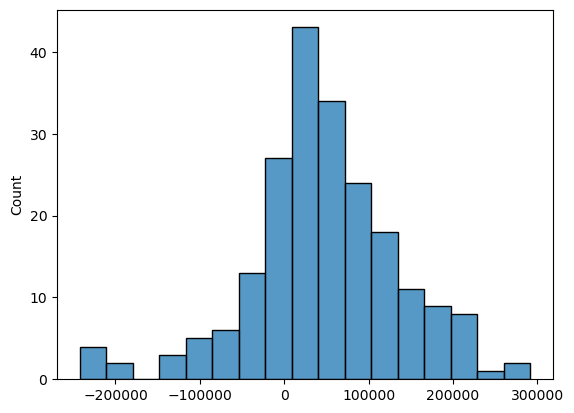

In [76]:
#Difference between synthpop and original, for each value
diff = all_results.loc[all_results['method'] == 'synthpop', 'score'].values - all_results.loc[all_results['method'] == 'original', 'score'].values
#Histogram for the difference between synthpop and original
sns.histplot(diff)